In [1]:
library(ArchR)
set.seed(1)
addArchRThreads(threads = 1)
addArchRGenome("mm10")
library(tidyverse)
library(here)
library(Seurat)
library(ComplexHeatmap)

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    unio

### Load data

In [11]:
Merged.proj.BC<-readRDS(file="/home/leetl/Gonocyte/Raw_data/BC.subset.newversion/Save-ArchR-Project.rds")

### Save data

In [87]:
Merged.proj.BC <- saveArchRProject(ArchRProj = Merged.proj.BC,outputDirectory = "BC.subset.newversion", load = TRUE,overwrite = TRUE)

Copying ArchRProject to new outputDirectory : /home/leetl/Gonocyte/Raw_data/BC.subset.newversion

Copying Arrow Files...

Copying Arrow Files (1 of 4)

Copying Arrow Files (2 of 4)

Copying Arrow Files (3 of 4)

Copying Arrow Files (4 of 4)

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 13): Annotations

Copying Other Files (2 of 13): Background-Peaks.rds

Copying Other Files (3 of 13): E18.2

Copying Other Files (4 of 13): Embeddings

Copying Other Files (5 of 13): GroupCoverages

Copying Other Files (6 of 13): IterativeLSI

Copying Other Files (7 of 13): P0.2

Copying Other Files (8 of 13): P3.2

Copying Other Files (9 of 13): P6.2

Copying Other Files (10 of 13): Peak2GeneLinks

Copying Other Files (11 of 13): PeakCalls

Copying Other Files (12 of 13): Plots

Copying Other Files (13 of 13): RNAIntegration

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                           

class: ArchRProject 
outputDirectory: /home/leetl/Gonocyte/Raw_data/BC.subset.newversion 
samples(4): P3.2 E18.2 P6.2 P0.2
sampleColData names(1): ArrowFiles
cellColData names(29): Sample TSSEnrichment ...
  predictedScore_Un_woharmony Seurat.Clusters
numberOfCells(1): 579
medianTSS(1): 22.658
medianFrags(1): 3442

### Dimensionality reduction

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-36f83d464ab0-Date-2020-10-23_Time-11-39-32.log
If there is an issue, please report to github with logFile!

2020-10-23 11:39:33 : Computing Total Accessibility Across All Features, 0.011 mins elapsed.

2020-10-23 11:39:35 : Computing Top Features, 0.042 mins elapsed.

###########
2020-10-23 11:39:35 : Running LSI (1 of 2) on Top Features, 0.046 mins elapsed.
###########

2020-10-23 11:39:35 : Creating Partial Matrix, 0.046 mins elapsed.

2020-10-23 11:39:38 : Computing LSI, 0.101 mins elapsed.

2020-10-23 11:39:51 : Identifying Clusters, 0.319 mins elapsed.

2020-10-23 11:39:52 : Identified 4 Clusters, 0.333 mins elapsed.

2020-10-23 11:39:52 : Saving LSI Iteration, 0.333 mins elapsed.

2020-10-23 11:40:01 : Creating Cluster Matrix on the total Group Features, 0.474 mins elapsed.

2020-10-23 11:40:22 : Computing Variable Features, 0.831 mins elapsed.

###########
2020-10-23 11:40:22 : Running LSI (2 of 2) on Variabl

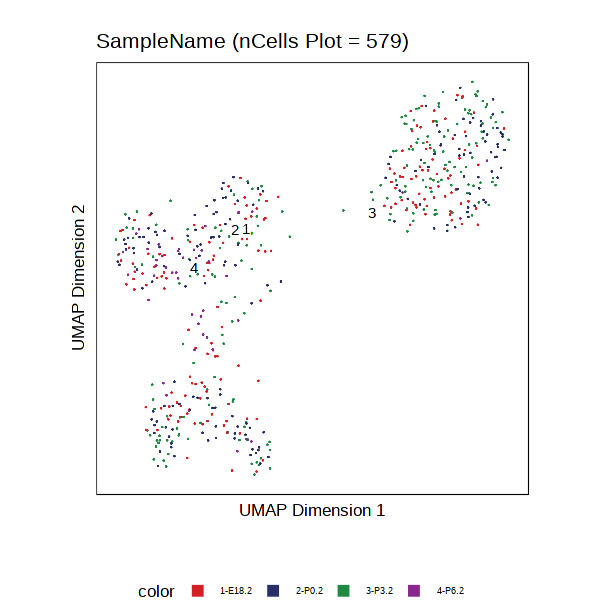

In [75]:
Merged.proj.BC <- addIterativeLSI(
    ArchRProj = Merged.proj.BC,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI", 
    iterations = 2, 
    clusterParams = list( #See Seurat::FindClusters
        resolution = c(0.7), 
        sampleCells = 10000, 
        n.start = 10,
        algorithm= 1    ), 
    varFeatures = 150000, 
    dimsToUse = 1:30,
    force = TRUE
)


In [76]:
Merged.proj.BC <- addUMAP(
    ArchRProj = Merged.proj.BC, 
    reducedDims = "IterativeLSI", 
    name = "UMAP", 
    nNeighbors = 30, 
    minDist = 0.5, 
    metric = "cosine",
    force = TRUE
)

11:40:42 UMAP embedding parameters a = 0.583 b = 1.334

11:40:42 Read 579 rows and found 30 numeric columns

11:40:42 Using Annoy for neighbor search, n_neighbors = 30

11:40:42 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

11:40:42 Writing NN index file to temp file /tmp/Rtmph7UkXf/file36f8699c7086

11:40:42 Searching Annoy index using 12 threads, search_k = 3000

11:40:42 Annoy recall = 100%

11:40:43 Commencing smooth kNN distance calibration using 12 threads

11:40:44 Initializing from normalized Laplacian + noise

11:40:44 Commencing optimization for 500 epochs, with 24094 positive edges

11:40:45 Optimization finished



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-7f3574799aa0-Date-2020-11-11_Time-15-24-34.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
2 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-7f3574799aa0-Date-2020-11-11_Time-15-24-34.log



$Sample

$Seurat.Clusters


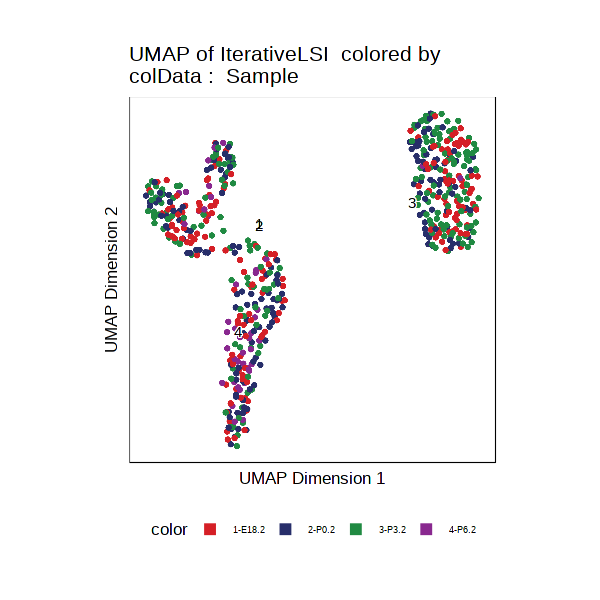

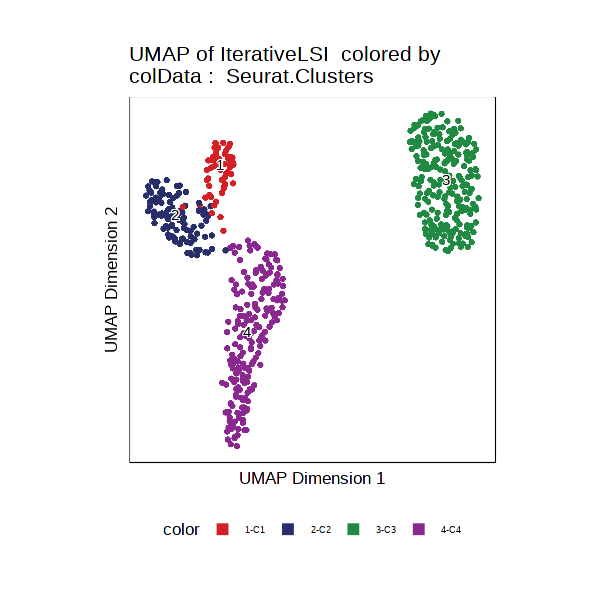

In [13]:
options(repr.plot.height=5,repr.plot.width=5)
p1 <- plotEmbedding(
    Merged.proj.BC, 
    colorBy = "cellColData", 
    name = c("Sample" , "Seurat.Clusters"
#           , "Scran.Clusters"
            ), 
#      pal = pal,
    size=3,
    plotAs = "points"
)
p1

In [80]:

Merged.proj.BC <- addClusters(
    input = Merged.proj.BC,
    reducedDims = "IterativeLSI",
    method = "Seurat",
    name = "Seurat.Clusters",
    resolution = 0.4,
    force= TRUE
)

ArchR logging to : ArchRLogs/ArchR-addClusters-36f872b9e358-Date-2020-10-23_Time-11-43-45.log
If there is an issue, please report to github with logFile!

Overriding previous entry for Seurat.Clusters

2020-10-23 11:43:45 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.001 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 579
Number of edges: 22474

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8651
Number of communities: 4
Elapsed time: 0 seconds


2020-10-23 11:43:46 : Testing Outlier Clusters, 0.014 mins elapsed.

2020-10-23 11:43:46 : Assigning Cluster Names to 4 Clusters, 0.014 mins elapsed.

2020-10-23 11:43:46 : Finished addClusters, 0.014 mins elapsed.



In [26]:
getAvailableMatrices(Merged.proj.BC)


[1] "Bulk.ATACMatrix"       "GeneIntegrationMatrix" "GeneScoreMatrix"      
[4] "MotifMatrix"           "PeakMatrix"            "TileMatrix"

In [48]:
Merged.proj.BC <- addImputeWeights(Merged.proj.BC,k=19,ka=3,td=2)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-36f835c70127-Date-2020-10-23_Time-10-36-07.log
If there is an issue, please report to github with logFile!

2020-10-23 10:36:07 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



### Peak calling

In [82]:
Merged.proj.BC <- addGroupCoverages(ArchRProj = Merged.proj.BC, groupBy = "Seurat.Clusters")

ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-36f81c13ba76-Date-2020-10-23_Time-11-44-48.log
If there is an issue, please report to github with logFile!

C1 (1 of 4) : CellGroups N = 2

C2 (2 of 4) : CellGroups N = 2

C3 (3 of 4) : CellGroups N = 3

C4 (4 of 4) : CellGroups N = 3

2020-10-23 11:44:48 : Creating Coverage Files!, 0.009 mins elapsed.

2020-10-23 11:44:48 : Batch Execution w/ safelapply!, 0.009 mins elapsed.

2020-10-23 11:44:48 : Group C1._.Rep1 (1 of 10) : Creating Group Coverage File : C1._.Rep1.insertions.coverage.h5, 0.009 mins elapsed.

Number of Cells = 40

Coverage File Exists!

Added Coverage Group

Added Metadata Group

Added ArrowCoverage Class

Added Coverage/Info

Added Coverage/Info/CellNames

2020-10-23 11:45:11 : Group C1._.Rep2 (2 of 10) : Creating Group Coverage File : C1._.Rep2.insertions.coverage.h5, 0.392 mins elapsed.

Number of Cells = 40

Coverage File Exists!

Added Coverage Group

Added Metadata Group

Added ArrowCoverage Class

Added Cover

In [83]:
pathToMacs2 <- findMacs2()
Merged.proj.BC <- addReproduciblePeakSet(
    ArchRProj = Merged.proj.BC, 
    groupBy = "Seurat.Clusters", 
    pathToMacs2 = pathToMacs2
)


Searching For MACS2..

Found with $path!

ArchR logging to : ArchRLogs/ArchR-addReproduciblePeakSet-36f81788a965-Date-2020-10-23_Time-11-50-47.log
If there is an issue, please report to github with logFile!

Calling Peaks with Macs2

2020-10-23 11:50:47 : Peak Calling Parameters!, 0.006 mins elapsed.



   Group nCells nCellsUsed nReplicates nMin nMax maxPeaks
C1    C1     57         55           2   40   40    27500
C2    C2    100        100           2   50   50    50000
C3    C3    231        228           3   62   97   114000
C4    C4    191        160           3   44   61    80000


2020-10-23 11:50:47 : Batching Peak Calls!, 0.006 mins elapsed.

2020-10-23 11:50:47 : Batch Execution w/ safelapply!, 0 mins elapsed.

2020-10-23 11:50:47 : Group 1 of 10, Calling Peaks with MACS2!, 0 mins elapsed.

Running Macs2 with Params : macs2 callpeak -g 1.87e+09 --name C1._.Rep1-1 --treatment /home/leetl/Gonocyte/Raw_data/Allcell.202009.wodoublet.filtering/PeakCalls/InsertionBeds/C1._.Rep1-1.insertions.bed --outdir /home/leetl/Gonocyte/Raw_data/Allcell.202009.wodoublet.filtering/PeakCalls/InsertionBeds --format BED --call-summits --keep-dup all --nomodel --nolambda --shift -75 --extsize 150 -q 0.1

2020-10-23 11:51:03 : Group 2 of 10, Calling Peaks with MACS2!, 0.251 mins elapsed.

Running Macs2 with Params : macs2 callpeak -g 1.87e+09 --name C1._.Rep2-2 --treatment /home/leetl/Gonocyte/Raw_data/Allcell.202009.wodoublet.filtering/PeakCalls/InsertionBeds/C1._.Rep2-2.insertions.bed --outdir /home/leetl/Gonocyte/Raw_data/Allcell.202009.wodoublet.filtering/PeakCalls/InsertionBeds 

[1] "/home/leetl/Gonocyte/Raw_data/Allcell.202009.wodoublet.filtering/PeakCalls/C1-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/leetl/Gonocyte/Raw_data/Allcell.202009.wodoublet.filtering/PeakCalls/C2-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/leetl/Gonocyte/Raw_data/Allcell.202009.wodoublet.filtering/PeakCalls/C3-reproduciblePeaks.gr.rds"


Annotating Peaks : Nearest Gene

Annotating Peaks : Gene

Annotating Peaks : TSS

Annotating Peaks : GC



[1] "/home/leetl/Gonocyte/Raw_data/Allcell.202009.wodoublet.filtering/PeakCalls/C4-reproduciblePeaks.gr.rds"


2020-10-23 11:52:55 : Creating Union Peak Set!, 2.131 mins elapsed.

Converged after 3 iterations!

Plotting Ggplot!

2020-10-23 11:52:57 : Finished Creating Union Peak Set (32474)!, 2.167 mins elapsed.



In [84]:
Merged.proj.BC <- addPeakMatrix(Merged.proj.BC)

ArchR logging to : ArchRLogs/ArchR-addPeakMatrix-36f819e18d3d-Date-2020-10-23_Time-11-52-57.log
If there is an issue, please report to github with logFile!

2020-10-23 11:52:57 : Batch Execution w/ safelapply!, 0 mins elapsed.

.createArrowGroup : Arrow Group already exists! Dropping Group from ArrowFile! This will take ~10-30 seconds!

.dropGroupsFromArrow : Initializing Temp ArrowFile

.dropGroupsFromArrow : Adding Metadata to Temp ArrowFile

.dropGroupsFromArrow : Adding SubGroups to Temp ArrowFile

.dropGroupsFromArrow : Move Temp ArrowFile to ArrowFile

2020-10-23 11:53:08 : Adding P3.2 to PeakMatrix for Chr (1 of 20)!, 0.001 mins elapsed.

2020-10-23 11:53:10 : Adding P3.2 to PeakMatrix for Chr (2 of 20)!, 0.028 mins elapsed.

2020-10-23 11:53:12 : Adding P3.2 to PeakMatrix for Chr (3 of 20)!, 0.055 mins elapsed.

2020-10-23 11:53:13 : Adding P3.2 to PeakMatrix for Chr (4 of 20)!, 0.081 mins elapsed.

2020-10-23 11:53:15 : Adding P3.2 to PeakMatrix for Chr (5 of 20)!, 0.108 mins 

In [85]:
Merged.proj.BC <- addMotifAnnotations(ArchRProj = Merged.proj.BC, motifSet = "cisbp", name = "Motif",force = TRUE)
Merged.proj.BC <- addBgdPeaks(Merged.proj.BC)



ArchR logging to : ArchRLogs/ArchR-addMotifAnnotations-36f86eba9473-Date-2020-10-23_Time-11-55-45.log
If there is an issue, please report to github with logFile!

peakAnnotation name already exists! Overriding.

2020-10-23 11:55:46 : Gettting Motif Set, Species : Mus musculus, 0.006 mins elapsed.

Using version 2 motifs!

2020-10-23 11:55:47 : Finding Motif Positions with motifmatchr!, 0.027 mins elapsed.

2020-10-23 11:56:22 : Creating Motif Overlap Matrix, 0.605 mins elapsed.

2020-10-23 11:56:22 : Finished Getting Motif Info!, 0.611 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addMotifAnnotations-36f86eba9473-Date-2020-10-23_Time-11-55-45.log

Identifying Background Peaks!



In [86]:
Merged.proj.BC <- addDeviationsMatrix(
  ArchRProj = Merged.proj.BC, 
  peakAnnotation = "Motif",
  force = TRUE
)

Using Previous Background Peaks!

ArchR logging to : ArchRLogs/ArchR-addDeviationsMatrix-36f85cc5b2e5-Date-2020-10-23_Time-11-56-24.log
If there is an issue, please report to github with logFile!



NULL


2020-10-23 11:56:26 : Batch Execution w/ safelapply!, 0 mins elapsed.

.createArrowGroup : Arrow Group already exists! Dropping Group from ArrowFile! This will take ~10-30 seconds!

.dropGroupsFromArrow : Initializing Temp ArrowFile

.dropGroupsFromArrow : Adding Metadata to Temp ArrowFile

.dropGroupsFromArrow : Adding SubGroups to Temp ArrowFile

.dropGroupsFromArrow : Move Temp ArrowFile to ArrowFile

2020-10-23 11:56:37 : chromVAR deviations P3.2 (1 of 4) Schep (2017), 0.179 mins elapsed.

2020-10-23 11:56:38 : P3.2 (1 of 4) : Deviations for Annotation 44 of 884, 0.018 mins elapsed.

2020-10-23 11:56:40 : P3.2 (1 of 4) : Deviations for Annotation 88 of 884, 0.048 mins elapsed.

2020-10-23 11:56:41 : P3.2 (1 of 4) : Deviations for Annotation 132 of 884, 0.077 mins elapsed.

2020-10-23 11:56:44 : P3.2 (1 of 4) : Deviations for Annotation 176 of 884, 0.112 mins elapsed.

2020-10-23 11:56:46 : P3.2 (1 of 4) : Deviations for Annotation 220 of 884, 0.148 mins elapsed.

2020-10-23 11:56:4

### Find marker genes

In [89]:
markersGS <- getMarkerFeatures(
    ArchRProj = Merged.proj.BC, 
    useMatrix = "GeneScoreMatrix", 
    groupBy = "Seurat.Clusters",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    k = 500,
    normBy = "ReadsInTSS",
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-36f81bf82022-Date-2020-10-23_Time-13-35-26.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2020-10-23 13:35:26 : Matching Known Biases, 0.001 mins elapsed.

Found less than 100 cells for background matching, Lowering k to 479

2020-10-23 13:35:26 : 

Found less than 100 cells for background matching, Lowering k to 348

2020-10-23 13:35:26 : 

Found less than 100 cells for background matching, Lowering k to 388

2020-10-23 13:35:26 : 

2020-10-23 13:35:27 : Computing Pairwise Tests (1 of 4), 0.017 mins elapsed.

2020-10-23 13:35:47 : Computing Pairwise Tests (2 of 4), 0.344 mins elapsed.

2020-10-23 13:36:05 : Computing Pairwise Tests (3 of 4), 0.652 mins elapsed.

2020-10-23 13:36:24 : Computing Pairwise Tests (4 of 4), 0.964 mins elapsed.

###########
2020-10-23 13:36:43 : Completed Pairwise Tests, 1.274 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getM

In [124]:
markerGenes  <- c(
   "Cd68","Cd52","Lyz2", # Macrophage C3 myeloid cells
    "Ngp","Ltf",# neu C3 myeloid cells
    "Runx3", "Tcf7", "Ccl5","Itk", "Cd2", "Eomes", "Cd7", "Klrd1", #T cell/NK C1
    "Tcf7", "Rora", "Lef1", "Ccr7", "Cd247", "Cd27", #T C2
    "Cd247", "Cd27", "Ccl2", "Irf5" #dendritic C4
  )


In [ ]:
markerList <- getMarkers(markersGS, cutOff = "FDR <= 0.1 & Log2FC >= 0.5")

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-36f8261912d5-Date-2020-10-23_Time-14-35-28.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2020-10-23 14:35:28 : 

1 
2 
3 
4 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-36f8261912d5-Date-2020-10-23_Time-14-35-28.log



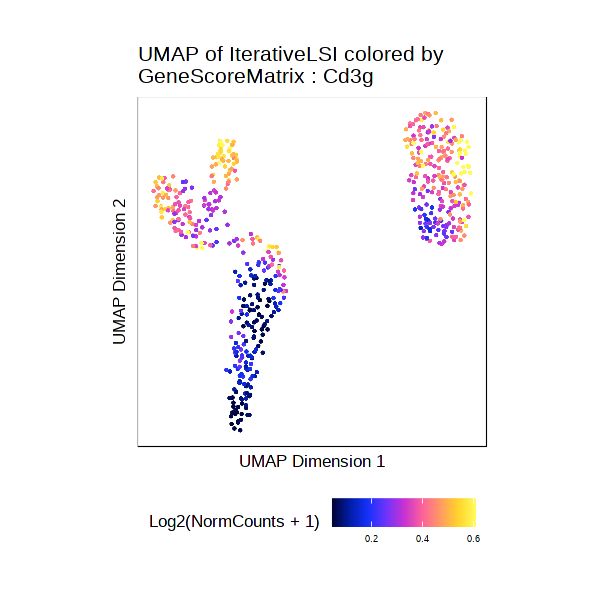

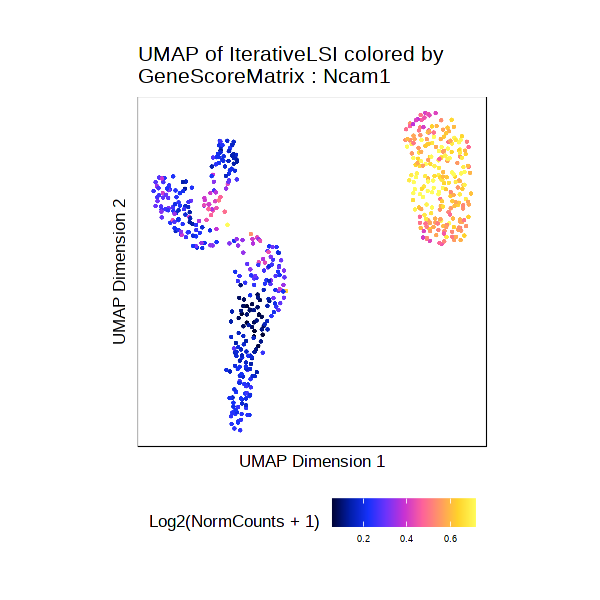

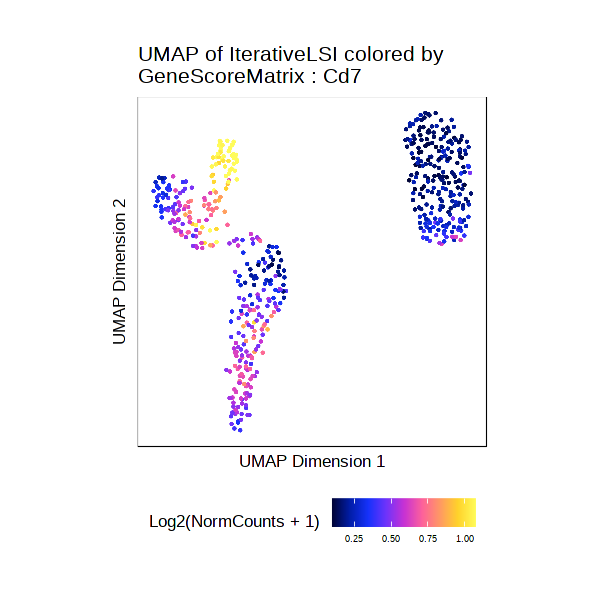

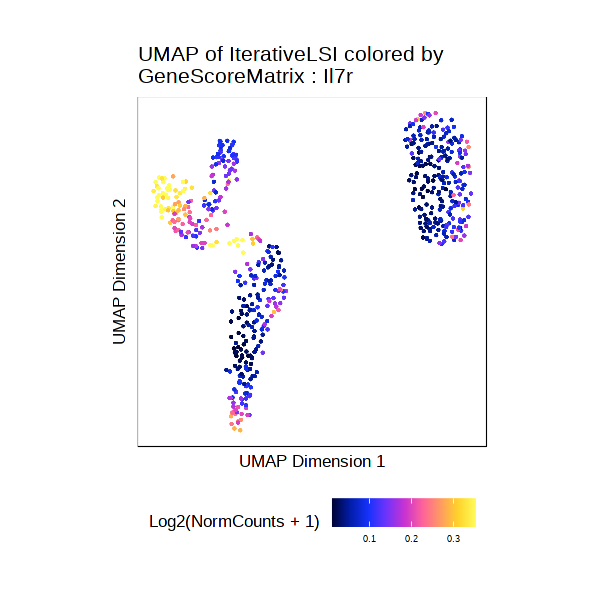

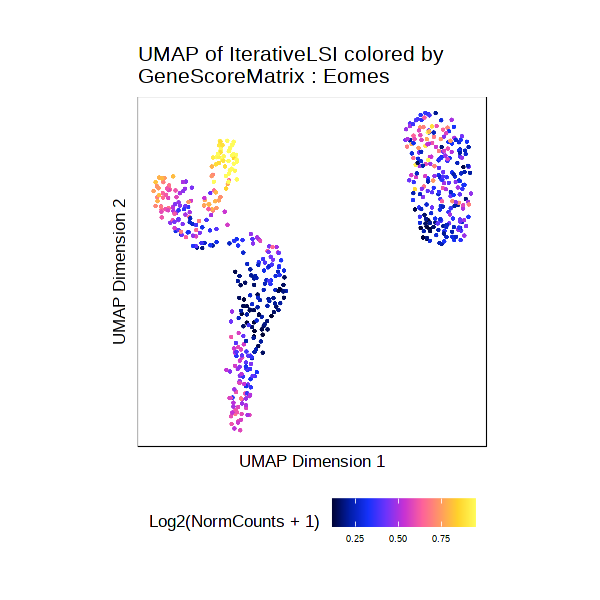

$Cd3g

$Ncam1

$Cd7

$Il7r

$Eomes

$Cd69

$Klrd1


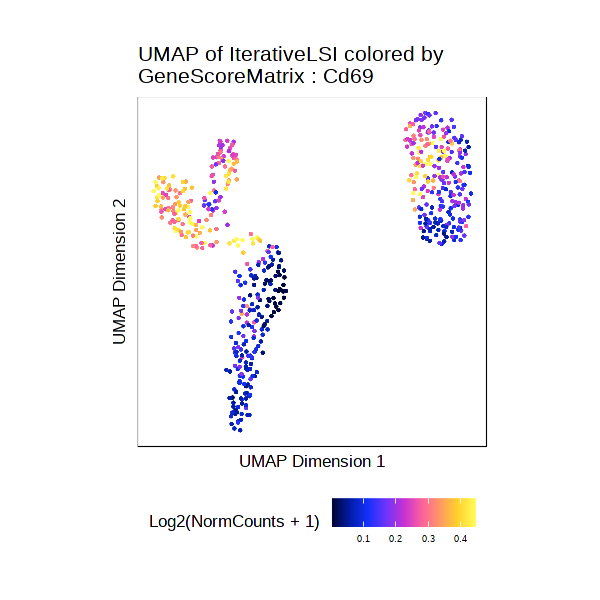

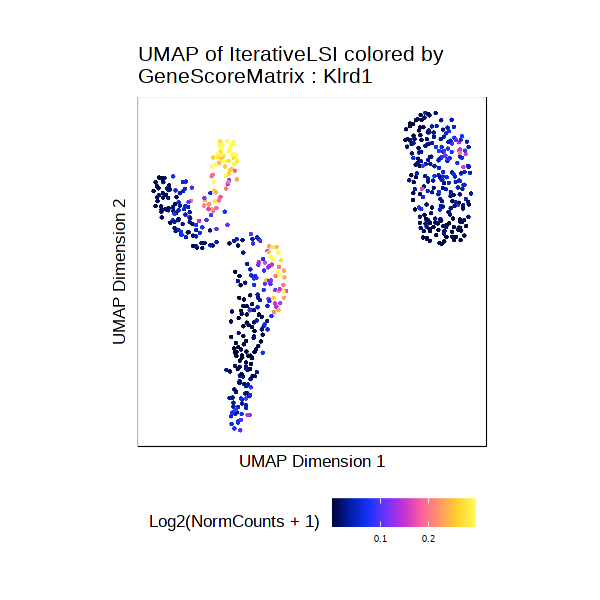

In [121]:
options(repr.plot.height=5,repr.plot.width=5)
p <- plotEmbedding(
    ArchRProj = Merged.proj.BC, 
    colorBy = "GeneScoreMatrix", 
    name = c("Cd3g", "Ncam1","Cd7", "Il7r", "Eomes", "Cd69", "Klrd1"),
    embedding = "UMAP",
    quantCut = c(0.01, 0.95),
    imputeWeights = getImputeWeights(Merged.proj.BC),
    plotAs = "point",
    size =2 
)
p

In [125]:
options(repr.plot.width=5,repr.plot.height=30)
heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.1 & Log2FC >= 0.5", 
 labelMarkers = markerGenes,
  transpose = TRUE
)

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-36f8404604be-Date-2020-10-23_Time-14-44-30.log
If there is an issue, please report to github with logFile!

Printing Top Marker Genes:

C1:

	Tram1, Col9a1, Arid5a, Gm3646, Il18r1, Gm17767, Stat4, Stk17b, Mob4, Cyp20a1, Abi2, Cd28, 4930487H11Rik, Ikzf2, Mir8096, B3gnt7, Twist2, D2hgdh, Ptpn4, Sctr

C2:

	Slco5a1, Ncoa2, Tfap2b, Tram2, Tmem14a, Gsta3, Kcnq5, Sdhaf4, Dst, Aff3, Mir6349, Npas2, Rfx8, Il1rl1, Slc9a2, Nck2, Tex30, Ccdc150, Icos, D230017M19Rik

C3:

	Ppp1r42, Arfgef1, Cpa6, Pi15, Gm29669, 4931428L18Rik, Mgat4a, Tbc1d8, Snord89, Rnf149, Creg2, Gm16894, Il1r2, Dnah7b, Dnah7c, 4933417E11Rik, Xrcc5, Cxcr2, Cxcr1, Atg9a

C4:

	Atp6v1h, Lactb2, Fam135a, Lmbrd1, 2010300C02Rik, Ercc5, Plcl1, Satb2, Aox2, Nrp2, D630023F18Rik, Smarcal1, Tmbim1, Cyp27a1, Ecel1, Kif1a, Tsn, Tmem37, Dbi, Rab7b

Identified 3427 markers!

Adding Annotations..

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-36f84

In [172]:
pdf("BC.heatmapGSM.pdf", width=6, height=4)
#options(repr.plot.height=20,repr.plot.width=8)
ComplexHeatmap::draw(heatmapGSM, heatmap_legend_side = "bot", annotation_legend_side = "bot")
dev.off()

png 
  2

In [160]:
p <- plotEmbedding(
    ArchRProj = Merged.proj.BC, 
    colorBy = "GeneScoreMatrix", 
    name = positive.TF, 
    embedding = "UMAP",
    quantCut = c(0.01, 0.95),
    imputeWeights = getImputeWeights(Merged.proj.BC),
    plotAs = "point",
    size =3 
)



Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-36f84e4fed9-Date-2020-10-23_Time-16-29-19.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2020-10-23 16:29:20 : 

1 
2 
3 
4 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
31 
32 
33 
34 
35 
36 
37 
38 
39 
40 
41 
42 
43 
44 
45 
46 
47 
48 
49 
50 
51 
52 
53 
54 
55 
56 
57 
58 
59 
60 
61 
62 
63 
64 
65 
66 
67 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-36f84e4fed9-Date-2020-10-23_Time-16-29-19.log



### Motif deviation

DataFrame with 6 rows and 6 columns
     seqnames     idx        name     combinedVars     combinedMeans      rank
        <Rle> <array>     <array>        <numeric>         <numeric> <integer>
f265        z     265   Sfpi1_265 5.75341709743753 0.312488446361245         1
f104        z     104     Fos_104 4.63527002826753  0.13135381753574         2
f843        z     843 Smarcc1_843 4.60260108251456 0.144845059369663         3
f108        z     108   Bach1_108 3.61537139903629  0.11485893640235         4
f269        z     269    Spic_269 3.46472408036899 0.225294772241935         5
f768        z     768   Eomes_768 3.33162485736858 -0.17166410681564         6


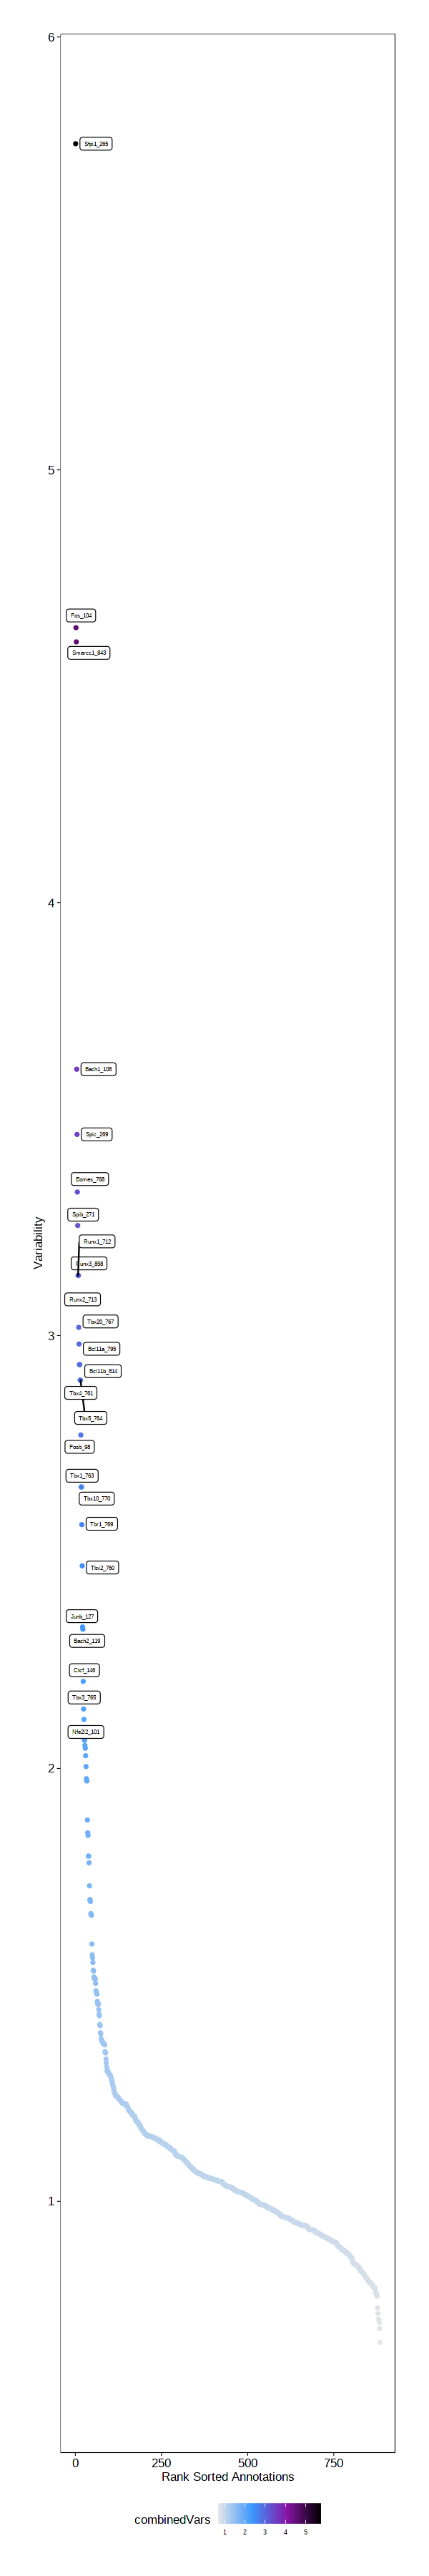

In [127]:
plotVarDev <- getVarDeviations(Merged.proj.BC, name = "MotifMatrix", plot = TRUE)
plotVarDev

In [128]:
markersPeaks <- getMarkerFeatures(
    ArchRProj = Merged.proj.BC, 
    useMatrix = "PeakMatrix", 
    groupBy = "Seurat.Clusters",
    k = 500,
    maxCells = 1000,
  bias = c("TSSEnrichment", "log10(nFrags)"),
  testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-36f83397ddb8-Date-2020-10-23_Time-15-34-52.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Integer.Matrix

2020-10-23 15:34:53 : Matching Known Biases, 0.001 mins elapsed.

Found less than 100 cells for background matching, Lowering k to 479

2020-10-23 15:34:53 : 

Found less than 100 cells for background matching, Lowering k to 348

2020-10-23 15:34:53 : 

Found less than 100 cells for background matching, Lowering k to 388

2020-10-23 15:34:53 : 

2020-10-23 15:34:53 : Computing Pairwise Tests (1 of 4), 0.01 mins elapsed.

2020-10-23 15:35:09 : Computing Pairwise Tests (2 of 4), 0.283 mins elapsed.

2020-10-23 15:35:26 : Computing Pairwise Tests (3 of 4), 0.552 mins elapsed.

2020-10-23 15:35:42 : Computing Pairwise Tests (4 of 4), 0.823 mins elapsed.

###########
2020-10-23 15:35:58 : Completed Pairwise Tests, 1.093 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getM

In [129]:
peakmarkerList <- getMarkers(markersPeaks, cutOff = "FDR <= 0.1 & Log2FC >= 0.05")
peakmarkerList

List of length 4
names(4): C1 C2 C3 C4

In [148]:
peakmarkerList$C1

DataFrame with 79 rows and 7 columns
      seqnames     idx     start       end           Log2FC                FDR
         <Rle> <array>   <array>   <array>        <numeric>          <numeric>
22670     chr5     375  36839639  36840139 5.65891527452504  0.029305654051225
23787     chr5    1492 125137942 125138442 4.88817707939928  0.029305654051225
23896     chr5    1601 134437426 134437926 6.18993981790659  0.029305654051225
28705     chr8     212  25067912  25068412  2.8926530413333 0.0312814521585557
31607     chr9    1282 107333606 107334106 4.78028686462423 0.0312814521585557
...        ...     ...       ...       ...              ...                ...
27300     chr7    1223  75796408  75796908 5.36749191985719 0.0908115310408873
28140     chr7    2063 128236820 128237320 3.26582259570351 0.0908115310408873
31071     chr9     746  63719711  63720211 5.43968131385405 0.0908115310408873
22397     chr5     102  23718748  23719248 3.14567974522504 0.0975011268137619
10703    chr15 

In [115]:
Merged.proj.BC <- addImputeWeights(Merged.proj.BC,k=9,ka=3,td=2)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-36f81b1ff8ab-Date-2020-10-23_Time-14-17-11.log
If there is an issue, please report to github with logFile!

2020-10-23 14:17:11 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



### Find positive TF regulators

In [15]:
seGroupMotif <- getGroupSE(ArchRProj = Merged.proj.BC, useMatrix = "MotifMatrix", groupBy = "Seurat.Clusters")
seGroupMotif

ArchR logging to : ArchRLogs/ArchR-getGroupSE-7f353d91a8f0-Date-2020-11-11_Time-15-25-05.log
If there is an issue, please report to github with logFile!

Getting Group Matrix

2020-11-11 15:25:05 : Constructing Group Matrix 1 of 2, 0 mins elapsed.

2020-11-11 15:25:06 : Finished Group Matrix 1 of 2, 0.015 mins elapsed.

2020-11-11 15:25:06 : Constructing Group Matrix 2 of 2, 0.016 mins elapsed.

2020-11-11 15:25:07 : Finished Group Matrix 2 of 2, 0.027 mins elapsed.

2020-11-11 15:25:07 : Successfully Created Group Matrix, 0.027 mins elapsed.

Normalizing by number of Cells

ArchR logging successful to : ArchRLogs/ArchR-getGroupSE-7f353d91a8f0-Date-2020-11-11_Time-15-25-05.log



class: SummarizedExperiment 
dim: 1768 4 
metadata(0):
assays(1): MotifMatrix
rownames(1768): f1 f2 ... f1767 f1768
rowData names(3): seqnames idx name
colnames(4): C1 C2 C3 C4
colData names(20): TSSEnrichment ReadsInTSS ...
  predictedScore_Un_woharmony nCells

In [16]:
seZ <- seGroupMotif[rowData(seGroupMotif)$seqnames=="z",]
rowData(seZ)$maxDelta <- lapply(seq_len(ncol(seZ)), function(x){
  rowMaxs(assay(seZ) - assay(seZ)[,x])
}) %>% Reduce("cbind", .) %>% rowMaxs

In [17]:
rownames(seZ) <- gsub("_.*","",rowData(seZ)$name)
colData(seZ)$celltype <- colData(seZ)$Seurat.Clusters
seZ

class: SummarizedExperiment 
dim: 884 4 
metadata(0):
assays(1): MotifMatrix
rownames(884): Tcfap2a Tcfap2b ... Smad5 Smad9
rowData names(4): seqnames idx name maxDelta
colnames(4): C1 C2 C3 C4
colData names(20): TSSEnrichment ReadsInTSS ...
  predictedScore_Un_woharmony nCells

In [18]:
corGSM_MM <- correlateMatrices(
    ArchRProj = Merged.proj.BC,
    useMatrix1 = "GeneScoreMatrix",
    useMatrix2 = "MotifMatrix",
    reducedDims = "IterativeLSI"
)
corGSM_MM

ArchR logging to : ArchRLogs/ArchR-correlateMatrices-7f3528e574bd-Date-2020-11-11_Time-15-25-18.log
If there is an issue, please report to github with logFile!

When accessing features from a matrix of class Sparse.Assays.Matrix it requires 1 seqname!
Continuing with first seqname 'z'!
If confused, try getFeatures(ArchRProj, 'MotifMatrix') to list out available seqnames for input!

2020-11-11 15:25:19 : Testing 793 Mappings!, 0.019 mins elapsed.

2020-11-11 15:25:19 : Computing KNN, 0.019 mins elapsed.

2020-11-11 15:25:19 : Identifying Non-Overlapping KNN pairs, 0.021 mins elapsed.

2020-11-11 15:25:19 : Identified 120 Groupings!, 0.029 mins elapsed.

2020-11-11 15:25:20 : Getting Group Matrix 1, 0.03 mins elapsed.

2020-11-11 15:25:37 : Getting Group Matrix 2, 0.314 mins elapsed.

Some entries in groupMat2 are less than 0, continuing without Log2 Normalization.
Most likely this assay is a deviations matrix.

Getting Correlations...

2020-11-11 15:25:38 : 

Computing Correlation (250 

DataFrame with 793 rows and 14 columns
    GeneScoreMatrix_name MotifMatrix_name                cor
                 <array>          <array>          <numeric>
1                  Sox17        Sox17_733 -0.812097763927879
2                  Mybl1        Mybl1_647 -0.112773016043251
3                    Msc           Msc_43  0.518109301296974
4                 Arid5a         Arid5a_9 -0.629342278840975
5                  Npas2         Npas2_44  0.627231379459186
...                  ...              ...                ...
789                 Esx1         Esx1_444  0.684799698749215
790                 Klf8         Klf8_194  -0.21102642222456
791               Mbtps2       Mbtps2_813   0.10980626882272
792                 Zfy1         Zfy1_213  0.096415778402558
793                  Sry          Sry_748                 NA
                    padj                 pval GeneScoreMatrix_seqnames
               <numeric>            <numeric>                    <Rle>
1   1.75061993842367e-26 2

[1] "Ascl1"  "Atf6"   "Bach1"  "Batf"   "Batf3"  "Cebpa"  "Cebpb"  "Cebpd" 
 [9] "Cebpe"  "Cebpg"  "Creb1"  "Dbx1"   "Egr1"   "Eomes"  "Fos"    "Fosb"  
[17] "Fosl2"  "Foxd3"  "Foxl1"  "Foxl1"  "Gata1"  "Gata3"  "Gata6"  "Hey1"  
[25] "Hey2"   "Hic1"   "Hoxd4"  "Irf1"   "Junb"   "Jund"   "Klf10"  "Klf12" 
[33] "Klf13"  "Klf2"   "Klf3"   "Klf5"   "Klf6"   "Lef1"   "Mecom"  "Myc"   
[41] "Myod1"  "Myog"   "Nfat5"  "Nfe2"   "Nfe2l2" "Nfil3"  "Nfya"   "Npas2" 
[49] "Rel"    "Rela"   "Runx3"  "Sp1"    "Sp2"    "Sp4"    "T"      "Tal2"  
[57] "Tbx1"   "Tcf7"   "Tcf7l1" "Tef"    "Yy1"    "Zeb1"   "Zfp263" "Zfp281"
[65] "Zfp3"   "Zfp42"  "Zfp740"

Warning message:
“Removed 8 rows containing missing values (geom_point).”


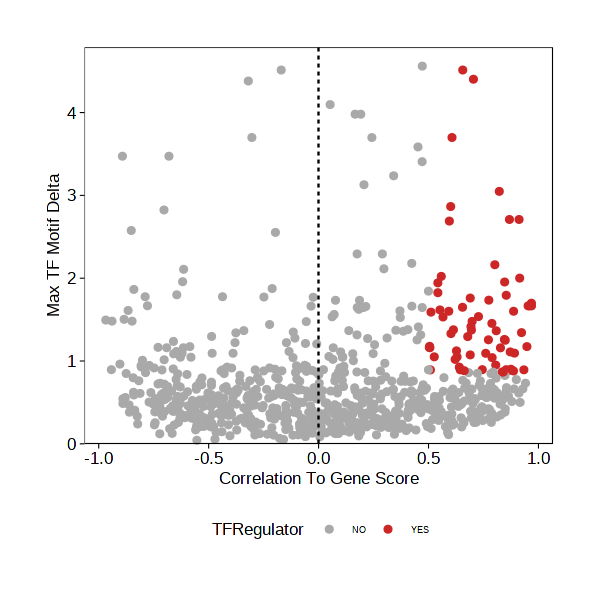

In [19]:
corGSM_MM$maxDelta <- rowData(seZ)[match(corGSM_MM$MotifMatrix_name, rowData(seZ)$name), "maxDelta"]
corGSM_MM <- corGSM_MM[order(abs(corGSM_MM$cor), decreasing = TRUE), ]
corGSM_MM <- corGSM_MM[which(!duplicated(gsub("\\-.*","",corGSM_MM[,"MotifMatrix_name"]))), ]
corGSM_MM$TFRegulator <- "NO"
corGSM_MM$TFRegulator[which(corGSM_MM$cor > 0.5 & corGSM_MM$padj < 0.01 & corGSM_MM$maxDelta > quantile(corGSM_MM$maxDelta, 0.75))] <- "YES"
sort(corGSM_MM[corGSM_MM$TFRegulator=="YES",1])

p <- ggplot(data.frame(corGSM_MM), aes(cor, maxDelta, color = TFRegulator)) +
  geom_point() + 
  theme_ArchR() +
  geom_vline(xintercept = 0, lty = "dashed") + 
  scale_color_manual(values = c("NO"="darkgrey", "YES"="firebrick3")) +
  xlab("Correlation To Gene Score") +
  ylab("Max TF Motif Delta") +
  scale_y_continuous(
    expand = c(0,0), 
    limits = c(0, max(corGSM_MM$maxDelta)*1.05)
  )

p

In [20]:
positive.TF <- sort(corGSM_MM[corGSM_MM$TFRegulator=="YES",1])
positive.TF

[1] "Ascl1"  "Atf6"   "Bach1"  "Batf"   "Batf3"  "Cebpa"  "Cebpb"  "Cebpd" 
 [9] "Cebpe"  "Cebpg"  "Creb1"  "Dbx1"   "Egr1"   "Eomes"  "Fos"    "Fosb"  
[17] "Fosl2"  "Foxd3"  "Foxl1"  "Foxl1"  "Gata1"  "Gata3"  "Gata6"  "Hey1"  
[25] "Hey2"   "Hic1"   "Hoxd4"  "Irf1"   "Junb"   "Jund"   "Klf10"  "Klf12" 
[33] "Klf13"  "Klf2"   "Klf3"   "Klf5"   "Klf6"   "Lef1"   "Mecom"  "Myc"   
[41] "Myod1"  "Myog"   "Nfat5"  "Nfe2"   "Nfe2l2" "Nfil3"  "Nfya"   "Npas2" 
[49] "Rel"    "Rela"   "Runx3"  "Sp1"    "Sp2"    "Sp4"    "T"      "Tal2"  
[57] "Tbx1"   "Tcf7"   "Tcf7l1" "Tef"    "Yy1"    "Zeb1"   "Zfp263" "Zfp281"
[65] "Zfp3"   "Zfp42"  "Zfp740"

In [171]:
markersGSM.TF <- markersGS[rowData(markersGS)$name %in% positive.TF ,]
options(repr.plot.width=10,repr.plot.height=5)
heatmapGSM <- plotMarkerHeatmap(
  seMarker = markersGSM.TF, 
   cutOff = "FDR <= 1 & Log2FC >= 0", 
 labelMarkers = positive.TF,
  transpose = TRUE,
    binaryClusterRows = TRUE,
       clusterCols = TRUE,
#     plotLog2FC = TRUE
)
# ComplexHeatmap::draw(heatmapGSM, heatmap_legend_side = "bot", annotation_legend_side = "bot")

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-36f8629f33a6-Date-2020-10-23_Time-16-48-40.log
If there is an issue, please report to github with logFile!

Printing Top Marker Genes:

C1:

	Creb1, Tcf7, Klf10, T, Gata3, Hoxd4, Hey1, Lef1, Foxd3, Runx3, Fosl2, Tcf7l1, Myod1, Dbx1, Nfat5, Eomes, Hey2, Irf1, Zfp3, Hic1

C2:

	Npas2, Myog, Tcf7, Klf5, Zfp740, T, Gata3, Hoxd4, Hey1, Lef1, Foxd3, Runx3, Tcf7l1, Myod1, Dbx1, Klf13, Eomes, Gata1, Hey2, Rel

C3:

	Zfp281, Atf6, Batf, Yy1, Klf6, Nfil3, Cebpe, Tef, Sp1, Nfe2, Cebpd, Nfya, Egr1, Cebpb, Tal2, Klf3, Zfp42, Jund, Klf2, Junb

C4:

	Fos, Cebpa, Npas2, Myog, Batf3, Ascl1, Klf12, Zfp263, Bach1, Rela, Nfe2l2, Fosb, Cebpg, Gata1, Hey2, Rel, Irf1, Zfp3, Hic1, Myc

Identified 66 markers!

Adding Annotations..

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-36f8629f33a6-Date-2020-10-23_Time-16-48-40.log



In [173]:
rownames(markersGS) <- rowData(markersGS)$name
colData(markersGS)$celltype <- colnames(markersGS)

In [175]:
saveRDS(markersGS,file="BC.markersGIM.rds")
saveRDS(seZ,file="BC.seZ.rds")
saveRDS(positive.TF,file="BC.postiveTF.rds")

In [104]:
saveArchRProject(ArchRProj = Merged.proj.SC,load = TRUE)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

class: ArchRProject 
outputDirectory: /home/leetl/Gonocyte/Raw_data/Germcell.subset.newversion 
samples(4): P3 E18 P6 P0
sampleColData names(1): ArrowFiles
cellColData names(24): Sample TSSEnrichment ... Major_trajectory
  Minor_trajectory
numberOfCells(1): 710
medianTSS(1): 15.571
medianFrags(1): 11304.5